In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = sns.load_dataset("mpg")

In [3]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [208]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [292]:
#Filling the NAN values with mean

In [293]:
cars["horsepower"] = cars["horsepower"].fillna(cars["horsepower"].mean())

In [294]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [295]:
#Analyzing data by showing the statistics 
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Which

which model has the most HP?
what is the correlation between cilinders and MPG?
who are the most powerful and weakest cars?
is there a correlation between weight and acceleration?



In [214]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [215]:
cars.groupby(["origin"]).agg({"acceleration":"sum"}).reset_index().rename(columns={"acceleration":"sum"}).sort_values("sum", ascending=True)

,origin,sum
0,europe,1175.1
1,japan,1277.6
2,usa,3743.4


In [216]:
#number of cars with 4 cyclinder
four = cars[cars["cylinders"] == 4]

In [287]:
cars["horsepower"].value_counts().nlargest(10).sort_values()

70.0     12
105.0    12
67.0     12
75.0     14
95.0     14
100.0    17
110.0    18
88.0     19
90.0     20
150.0    22
Name: horsepower, dtype: int64

In [288]:
models_year  = cars["model_year"].value_counts()
models_year

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model_year, dtype: int64

In [220]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [281]:
#Highest horsepower produced in car by country
cars.groupby(["origin"]).agg({"horsepower" : 'max'}).reset_index()\
.rename(columns={"horsepower" : "highest HP"})

,origin,highest HP
0,europe,133.0
1,japan,132.0
2,usa,230.0


In [280]:
#which car has the most accelaration
cars.groupby(["name"]).agg({"acceleration" : 'max'}).reset_index().rename\
(columns={"acceleration" : "acc"}).sort_values('acc',ascending = False).head(10)

,name,acc
211,peugeot 504,24.8
301,vw pickup,24.6
300,vw dasher (diesel),23.7
293,volkswagen type 3,23.5
201,oldsmobile cutlass salon brougham,22.2
51,chevrolet chevette,22.2
66,chevrolet woody,22.1
185,mercedes-benz 240d,21.8
303,vw rabbit c (diesel),21.7
289,volkswagen rabbit custom diesel,21.5


In [268]:
#how many types of cars are there
len(cars["name"].unique())

305

In [224]:
# plt.figure(figsize=(20,12))
# cars['name'].value_counts().nlargest(20).plot.bar(color='red')
# plt.gcf().autofmt_xdate()

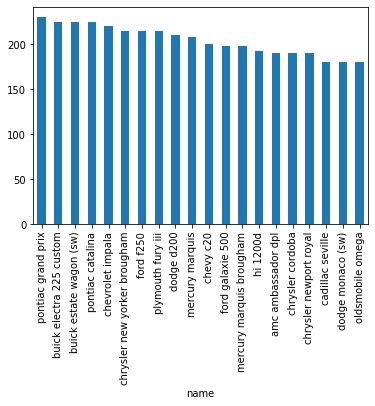

In [225]:
cars.groupby('name')['horsepower'].max().nlargest(20).plot.bar()

In [228]:
#how many cars in the data have 8 cyclinders ?

In [229]:
eight = cars[cars['cylinders']==8]["name"].unique()

In [230]:
len(eight)

82

In [231]:
#the correlation with cyclinders size and MPG

In [232]:
correlations = cars.corr()

In [233]:
correlations

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


In [234]:
correlations[["mpg","cylinders"]]

,mpg,cylinders
mpg,1.000000,-0.775396
cylinders,-0.775396,1.000000
displacement,-0.804203,0.950721
horsepower,-0.771437,0.838939
weight,-0.831741,0.896017
acceleration,0.420289,-0.505419
model_year,0.579267,-0.348746


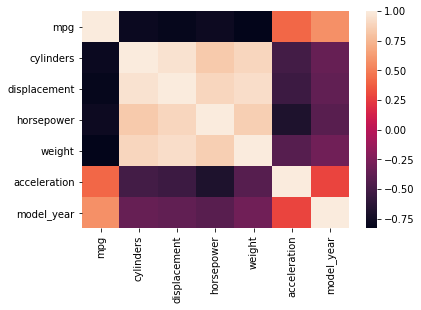

In [235]:
sns.heatmap(correlations)
plt.show()

In [236]:
#horse power and cylinders have a strong positive correlation between them which make sense
#because the more cylinders might bring up more power to a vehicle
#A strong positive correlation between cylinders and weigh because more equipment load in a vehicle
# has a tendecy to give more weight to it.
#Strong negative correlations between MPG and cylinders because more cylinders a vehicle has would cause more consumption of gas


In [296]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [308]:
#which cars arer the fastest and why?
cars.groupby("name")["horsepower"].max().nlargest(15)

name
pontiac grand prix              230.0
buick electra 225 custom        225.0
buick estate wagon (sw)         225.0
pontiac catalina                225.0
chevrolet impala                220.0
chrysler new yorker brougham    215.0
ford f250                       215.0
plymouth fury iii               215.0
dodge d200                      210.0
mercury marquis                 208.0
chevy c20                       200.0
ford galaxie 500                198.0
mercury marquis brougham        198.0
hi 1200d                        193.0
amc ambassador dpl              190.0
Name: horsepower, dtype: float64

In [311]:
cyc = cars.groupby("name")["cylinders"].max().nlargest()
cyc

name
amc ambassador brougham    8
amc ambassador dpl         8
amc ambassador sst         8
amc matador                8
amc matador (sw)           8
Name: cylinders, dtype: int64

In [320]:
weight = cars.groupby("name")["weight"].min().nsmallest()

In [321]:
weight

name
datsun 1200            1613
toyota corona          1649
toyota starlet         1755
honda civic 1300       1760
toyota corolla 1200    1773
Name: weight, dtype: int64